La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

 recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa.

 A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#Extracción de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#exportar tablas con colores


import matplotlib.pyplot as plt
import numpy as np

def exportar_tabla_img(df, nombre_archivo="tabla.png", colores=None, title=None):
    """
    Exporta un DataFrame como imagen PNG sin usar dataframe_image.
    Compatible con Google Colab.

    Parámetros:
    - df: DataFrame a exportar.
    - nombre_archivo: nombre de la imagen de salida.
    - colores: dict opcional {"columna": "color"}, ej: {"Porcentaje": "lightgreen"}
    - title: Título opcional encima de la tabla.
    """

    fig, ax = plt.subplots(figsize=(df.shape[1] * 1.8, df.shape[0] * 0.7 + 1))
    ax.axis("off")

    # Crear lista de colores por celda
    cell_colors = []
    for i in range(len(df)):
        fila = []
        for j, col in enumerate(df.columns):
            if colores and col in colores:
                fila.append(colores[col])
            else:
                fila.append("white")
        cell_colors.append(fila)

    # Crear tabla
    tabla = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     cellLoc='center',
                     cellColours=cell_colors,
                     loc='center')

    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1.2, 1.2)

    # Bordes más profesionales
    for key, cell in tabla.get_celld().items():
        cell.set_edgecolor("black")
        cell.set_linewidth(0.7)

        # Cabecera más estilizada
        if key[0] == 0:
            cell.set_facecolor("#e6e6e6")
            cell.set_fontweight("bold")

    # Título opcional
    if title:
        plt.title(title, fontsize=14, fontweight="bold", pad=15)

    plt.savefig(nombre_archivo, bbox_inches="tight", dpi=300)
    plt.close()

    print(f"Imagen guardada como: {nombre_archivo}")


In [3]:
datos = pd.read_json('TelecomX_Data.json')
datos.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Identificamos datos anidados

In [4]:
datos_customer = datos['customer'].apply(pd.Series)
datos_phone    = datos['phone'].apply(pd.Series)
datos_internet = datos['internet'].apply(pd.Series)
datos_account  = datos['account'].apply(pd.Series)
datos = pd.concat(
    [datos.drop(columns=['customer','phone','internet','account']),
     datos_customer, datos_phone, datos_internet, datos_account],
    axis=1
)
datos.sample()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
1966,2792-LSHWX,No,Female,0,No,No,1,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.4, 'Total': '83.4'}"


Continuamos con un dato anidado

In [5]:
datos_charges  = datos['Charges'].apply(pd.Series)
datos = pd.concat(
    [datos.drop(columns=['Charges']),
     datos_charges],
    axis=1
)
datos.sample(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
6662,9154-QDGTH,No,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.3,4451.85
1345,1937-OTUKY,No,Female,0,Yes,No,72,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),98.2,7015.9


Limpieza de datos

In [6]:
datos = datos.rename(columns={'Churn': 'Baja'})
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Baja              7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
pd.set_option('display.max_columns',None)  #para mostrar toda la tabla

##Revisamos la correlación entre:

telefono vs (multiples lineas)
internet vs (OnlineBackup OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies	)

In [8]:
datos[
    (datos["PhoneService"] == "No") & (datos["MultipleLines"].isin(["Yes"]))
]

,customerID,Baja,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total


In [9]:
datos[
    (datos["InternetService"] == "No") &
    (
        (datos["OnlineBackup"].isin(["Yes"])) |
        (datos["OnlineSecurity"].isin(["Yes"])) |
        (datos["DeviceProtection"].isin(["Yes"])) |
        (datos["TechSupport"].isin(["Yes"])) |
        (datos["StreamingTV"].isin(["Yes"])) |
        (datos["StreamingMovies"].isin(["Yes"]))

    )
]


,customerID,Baja,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total



verificamos datos unicos, para ver si necesitan ser modificados



In [10]:
print(datos["OnlineBackup"].unique())
print(datos["OnlineSecurity"].unique())
print(datos["DeviceProtection"].unique())
print(datos["TechSupport"].unique())
print(datos["StreamingTV"].unique())
print(datos["StreamingMovies"].unique())
print(datos["PhoneService"].unique())
print((datos["MultipleLines"]).unique())

['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']
['No' 'Yes' 'No phone service']


Modificamos el No internet service a No, ya que esta relacionado al NO INTERNET

In [11]:
cols = [
    "OnlineBackup", "OnlineSecurity", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

datos.loc[:,cols] = datos.loc[:,cols].replace("No internet service", "No")


modificamos el no phone service a no

In [12]:
datos.loc[:,"MultipleLines"] = datos.loc[:,"MultipleLines"].replace("No phone service", "No")

corroboramos el cambio

In [13]:
print(datos["OnlineBackup"].unique())
print(datos["OnlineSecurity"].unique())
print(datos["DeviceProtection"].unique())
print(datos["TechSupport"].unique())
print(datos["StreamingTV"].unique())
print(datos["StreamingMovies"].unique())
print((datos["MultipleLines"]).unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


In [14]:
datos.sample(4)

,customerID,Baja,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
4571,6261-LHRTG,No,Female,0,No,No,26,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1406.9
4731,6481-ESCNL,No,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),100.55,2878.75
997,1399-UBQIU,No,Male,0,No,No,11,Yes,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,712.25
5809,7950-XWOVN,No,Male,0,No,No,11,No,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,No,Mailed check,34.70,383.55


##analisis de bajas

Baja
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


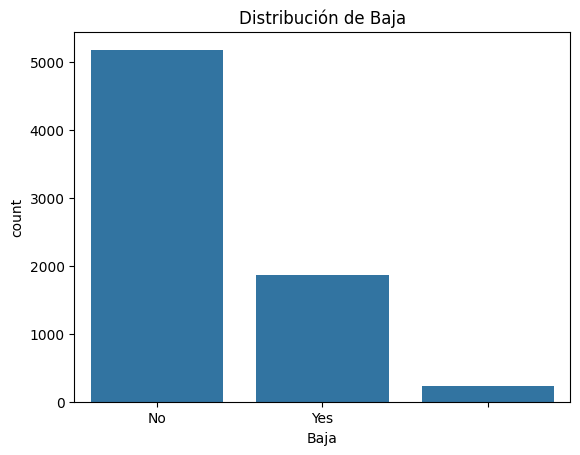

In [15]:
# Porcentaje de clientes que se dieron de baja
porcentaje_baja = datos['Baja'].value_counts(normalize=True) * 100
print(porcentaje_baja)

# Gráfico de barras
sns.countplot(x='Baja', data=datos)
plt.title("Distribución de Baja")
plt.show()


se tiene una retencion del 71.20 %, una salida del 25.72 % y 3.08% de datos no identificados del total de los clientes


como los datos no identificados son menores al  5% podemos eliminarlos y no afectaran al analisis

In [16]:
datos = datos[datos['Baja'].isin(['Yes', 'No'])]

##LIMPIEZA DE DATOS QUE NO SE UTILIZARAN

In [17]:
datos_limpios = datos.drop(columns=['customerID','Total'])
datos_limpios.sample(2)

,Baja,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly
1755,No,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65
4440,Yes,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Credit card (automatic),80.15


verificamos que no existan datos vacios y que las columnas solo tengan 1 valores, exepto tenure, monthly y daily,paymenth method

In [18]:
for col in datos_limpios.columns:
    print(f"\n--- Columna: {col} ---")

    # Valores únicos
    print("Valores únicos:", datos_limpios[col].unique())

    # Conteo de NaN
    print("Cantidad de NaN:", datos_limpios[col].isna().sum())

    # Conteo de valores vacíos (solo para columnas de tipo object o category)
    if datos_limpios[col].dtype.name in ['object', 'category']:
        print("Cantidad de valores vacíos:", (datos_limpios[col] == '').sum())



--- Columna: Baja ---
Valores únicos: ['No' 'Yes']
Cantidad de NaN: 0
Cantidad de valores vacíos: 0

--- Columna: gender ---
Valores únicos: ['Female' 'Male']
Cantidad de NaN: 0
Cantidad de valores vacíos: 0

--- Columna: SeniorCitizen ---
Valores únicos: [0 1]
Cantidad de NaN: 0

--- Columna: Partner ---
Valores únicos: ['Yes' 'No']
Cantidad de NaN: 0
Cantidad de valores vacíos: 0

--- Columna: Dependents ---
Valores únicos: ['Yes' 'No']
Cantidad de NaN: 0
Cantidad de valores vacíos: 0

--- Columna: tenure ---
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Cantidad de NaN: 0

--- Columna: PhoneService ---
Valores únicos: ['Yes' 'No']
Cantidad de NaN: 0
Cantidad de valores vacíos: 0

--- Columna: MultipleLines ---
Valores únicos: ['No' 'Yes']
Cantidad de NaN: 0
Cantidad de valores vacíos: 0

---

### Analisis categorico (datos_cat) y Analisis numerico (datos_num)


In [19]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Baja              7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

creamos DF para analisis numerico ( medias,etc) y categorico ( demografico)

In [20]:
datos_num = datos_limpios.copy()

analisis numerico

las columns que tienen mas de 2 opciones, no se puede convertir a un valor  0 /1  , pero por medio del metodo pd.get_dummies, podemos generar columnas booleanas, para depues transformarlas a 0/1

In [21]:
cols_dummies = ["InternetService", "Contract", "PaymentMethod"]

datos_num = pd.get_dummies(datos_num, columns=cols_dummies, drop_first=False)

datos_num.sample(2)

,Baja,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Monthly,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
667,Yes,Female,0,No,No,7,Yes,No,No,No,No,No,Yes,No,Yes,80.3,False,True,False,True,False,False,False,False,False,True
3288,No,Male,1,Yes,No,45,Yes,Yes,No,No,No,No,No,No,No,24.7,False,False,True,False,True,False,False,True,False,False


In [22]:
datos_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Baja                                     7043 non-null   object 
 1   gender                                   7043 non-null   object 
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   object 
 4   Dependents                               7043 non-null   object 
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   object 
 7   MultipleLines                            7043 non-null   object 
 8   OnlineSecurity                           7043 non-null   object 
 9   OnlineBackup                             7043 non-null   object 
 10  DeviceProtection                         7043 non-nul

In [23]:
# 1. YES/NO → 1/0
cols_yes_no = [
    "Baja","Partner","Dependents","PhoneService",
    "MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
    "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"
]

# Convertir Yes/No a 1/0
for col in cols_yes_no:
    datos_num[col] = datos_num[col].map({"Yes": 1, "No": 0})

# 2. Convertir gender
datos_num["gender"] = datos_num["gender"].map({"Male": 1, "Female": 0})

cols_f_t = [
    "InternetService_DSL","InternetService_Fiber optic","InternetService_No",
    "Contract_Month-to-month","Contract_One year","Contract_Two year",
    "PaymentMethod_Bank transfer (automatic)", "PaymentMethod_Credit card (automatic)",
    "PaymentMethod_Electronic check","PaymentMethod_Mailed check"
]
#para boolean solo pasamos a enteros True=1 false = 0

for col in cols_f_t:
    datos_num[col] = datos_num[col].astype(int)



In [24]:
datos_num.sample(5)

,Baja,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Monthly,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6791,0,1,0,0,0,4,1,0,0,0,0,0,0,0,0,20.70,0,0,1,1,0,0,0,0,0,1
1476,0,1,0,0,0,25,1,0,0,0,0,0,0,0,1,20.15,0,0,1,1,0,0,0,0,0,1
5191,0,0,0,1,1,17,1,0,1,1,0,0,1,1,0,74.55,1,0,0,1,0,0,0,0,0,1
870,0,0,0,1,0,72,1,1,1,1,1,1,1,1,1,91.15,1,0,0,0,0,1,1,0,0,0
561,0,0,0,0,1,11,0,0,0,0,0,0,0,0,0,25.20,1,0,0,1,0,0,0,0,1,0


In [25]:
datos_num.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Baja                                     7043 non-null   int64  
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 non-nul

Separamos variables continuas de binarias

In [26]:
# separamos cada factor, segmento para analizar por partes
cols_continuas = ["tenure", "Monthly"]
col_baja = ["Baja"]
cols_segm = ["gender","SeniorCitizen","Partner","Dependents"	]
cols_factores = ["PhoneService", "MultipleLines", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
    "StreamingMovies", "PaperlessBilling", "InternetService_DSL",
    "InternetService_Fiber optic", "InternetService_No", "Contract_Month-to-month",
    "Contract_One year", "Contract_Two year", "PaymentMethod_Bank transfer (automatic)",
    "PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check",
    "PaymentMethod_Mailed check"
]


# Crear DataFrames separados
datos_continuas = datos_num[cols_continuas].copy()
Baja_binarias = datos_num[col_baja].copy()
datos_segmento= datos_num[cols_segm].copy()
datos_factores= datos_num[cols_factores].copy()

In [27]:
tabla_continuas = datos_continuas.describe().T  #  variables continuas
baja =  Baja_binarias.mean() * 100  # porcentaje de baja
baja = baja.round(2).astype(str) + " %"

tabla_segmento = datos_segmento.mean().sort_values(ascending=False).to_frame("Porcentaje")*100

tabla_factores = datos_factores.mean().sort_values(ascending=False).to_frame("Porcentaje")*100


Visualización




In [28]:
# Mostrar la tabla de 'Baja'
print("% de usuarios dados de Baja:")
print(baja)

# Mostrar los SEGMENTOS
print("\n distribución de los clientes:")
print(tabla_segmento)


print("\n servicios contratados:")
print(tabla_factores)

print("\n analisis numerico")
print(tabla_continuas)


% de usuarios dados de Baja:
Baja    26.54 %
dtype: object

 distribución de los clientes:
               Porcentaje
gender          50.475650
Partner         48.303280
Dependents      29.958824
SeniorCitizen   16.214681

 servicios contratados:
                                         Porcentaje
PhoneService                              90.316626
PaperlessBilling                          59.221922
Contract_Month-to-month                   55.019168
InternetService_Fiber optic               43.958540
MultipleLines                             42.183729
StreamingMovies                           38.790288
StreamingTV                               38.435326
OnlineBackup                              34.488144
DeviceProtection                          34.388755
InternetService_DSL                       34.374556
PaymentMethod_Electronic check            33.579441
TechSupport                               29.021724
OnlineSecurity                            28.666761
Contract_Two year         

###estilos de tablas

In [29]:
tabla_estilo_segmento = tabla_segmento.style.background_gradient(
    cmap="Greens",  # o cualquier otro colormap
    subset=["Porcentaje"]
).format("{:.2f} %")

tabla_estilo_factores = tabla_factores.style.background_gradient(
    cmap="Greens",  # o cualquier otro colormap
    subset=["Porcentaje"]
).format("{:.2f} %")




###Visualización de tablas

In [30]:
display('segmento clientes:')
display(tabla_estilo_segmento)

'segmento clientes:'

,Porcentaje
gender,50.48 %
Partner,48.30 %
Dependents,29.96 %
SeniorCitizen,16.21 %


el 50.48% de los clientes son hombres,  48.30% tienen pareja, 29.96 tienen dependientes, y el 16.21 son señores mayores a 65 años

La base de clientes está compuesta por hombres y mujeres en proporciones prácticamente iguales (50/50).
Cerca de la mitad tiene pareja (48%), pero sólo el 30% tiene dependientes.
Los adultos mayores representan 16%, lo cual indica que la base está dominada por clientes de edad media.


In [31]:
display("servicios contratados:")
display(tabla_estilo_factores)

'servicios contratados:'

,Porcentaje
PhoneService,90.32 %
PaperlessBilling,59.22 %
Contract_Month-to-month,55.02 %
InternetService_Fiber optic,43.96 %
MultipleLines,42.18 %
StreamingMovies,38.79 %
StreamingTV,38.44 %
OnlineBackup,34.49 %
DeviceProtection,34.39 %
InternetService_DSL,34.37 %


Como podemos observar, la empresa es  principalmente proveedora del servicio de telefonia, siendo este un servicio requerido por el 90% de sus clientes, mas de la mitad utiliza el sistema PaperlesBilling, aproximadamente la mitad (55.02%) de sus usuarios tienen un contrato mes a mes ( posible riesgo) y el segundo servicio mas contratado por sus clientes es el intenternet de fibra optica con un 43.96% del total de sus clientes ( Factor importante a analizar).

In [32]:
print(baja)

Baja    26.54 %
dtype: object


la tasa de cancelación tipica en empresas de telecom ronda entre el 15-20%
lo cual nos indica que tenemos una tasa de cancelación elevada

In [33]:
# Separar por grupo
baja_si = datos_num[datos_num['Baja'] == 1]
baja_no = datos_num[datos_num['Baja'] == 0]

# Resumen estadístico por grupo
comparativa_continuas = pd.DataFrame({
    "Media_Si": baja_si[cols_continuas].mean(),
    "Media_No": baja_no[cols_continuas].mean(),
    "Mediana_Si": baja_si[cols_continuas].median(),
    "Mediana_No": baja_no[cols_continuas].median()
})

comparativa_continuas


,Media_Si,Media_No,Mediana_Si,Mediana_No
tenure,17.979133,37.569965,10.00,38.000
Monthly,74.441332,61.265124,79.65,64.425


In [34]:
#Variables para el boxplot comparativo
continuas = datos_num[["tenure", "Monthly"]]
df_long = df_long = datos_num.melt(id_vars="Baja", value_vars=cols_continuas, var_name="Variable", value_name="Valor")

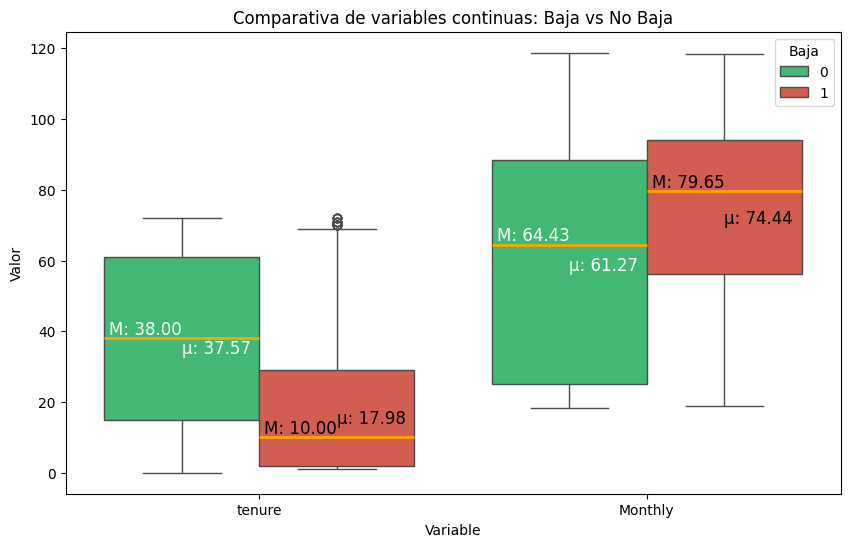

In [60]:

plt.figure(figsize=(10,6))

# Colores de las cajas
colores_caja = {0: "#2ECC71", 1: "#E74C3C"}       # Verde para No, Rojo para Yes
# Colores de los textos
colores_texto_mediana = {0: "white", 1: "black"}
colores_texto_media = {0: "white", 1: "black"}      # diferente al de la mediana para diferenciar

# Boxplot
ax = sns.boxplot(
    x="Variable",
    y="Valor",
    hue="Baja",
    data=df_long,
    palette=colores_caja,
    medianprops={"color":"orange", "linewidth":2},

)

# Añadir valores de mediana y media sobre cada caja
for i, variable in enumerate(df_long["Variable"].unique()):
    for j, baja_val in enumerate(df_long["Baja"].unique()):
        grupo = df_long[(df_long["Variable"]==variable) & (df_long["Baja"]==baja_val)]

        mediana = grupo["Valor"].median()
        media = grupo["Valor"].mean()

        x_pos = i - 0.2 + j*0.4

        # Texto de la mediana
        plt.text(
            x_pos,
            mediana,
            f"M: {mediana:.2f}",
            ha='right',
            va='bottom',
            color=colores_texto_mediana[baja_val],
            fontsize=12
        )

        # Texto de la media
        plt.text(
            x_pos,
            media,
            f"μ: {media:.2f}",
            ha='left',
            va='top',
            color=colores_texto_media[baja_val],
            fontsize=12
        )

plt.title("Comparativa de variables continuas: Baja vs No Baja")
plt.ylabel("Valor")
plt.xlabel("Variable")
plt.legend(title="Baja")

plt.savefig("/content/drive/MyDrive/telecomX/boxplot_baja_vs_no.png", format="png", bbox_inches='tight', dpi=300)
plt.show()

aunque el promedio de estancia de los clientes es de 18 meses, al calcular la mediana obtenermos que la mayor parte de los clientes que se van, tienen 10 meses o menos

In [36]:
tabla_segmento_baja = datos_segmento.copy()
tabla_segmento_baja["Baja"] = datos_num["Baja"]

# Calcular porcentaje por grupo
porcentaje_segmento = tabla_segmento_baja.groupby("Baja").mean() * 100
porcentaje_segmento


,gender,SeniorCitizen,Partner,Dependents
Baja,,,,
0,50.734441,12.872053,52.821801,34.480093
1,49.759230,25.468165,35.794543,17.442483


style

In [37]:
def resaltar_max_por_col(col):
    max_val = col.max()
    if col.name:  # columna actual
        return ['background-color: green' if v == max_val and col.name else '' for v in col]

# Ahora con condicional según Baja
def resaltar_por_baja(col):
    max_val = col.max()
    return [
        'background-color: green' if v == max_val and col.name=='Baja=No' else
        'background-color: red' if v == max_val and col.name=='Baja=Yes' else
        ''
        for v in col
    ]

# Pero necesitamos usar los índices para diferenciar las filas (Baja=0 y Baja=1)
segmento_style = porcentaje_segmento.style.apply(
    lambda col: ['background-color: green' if v == col.max() and idx==0
                 else 'background-color: red' if v == col.max() and idx==1
                 else ''
                 for idx, v in enumerate(col)],
    axis=0
).format("{:.2f} %")\
.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black'),
                                 ('background-color', 'white'),
                                 ('text-align', 'center')]},
    {'selector': 'td', 'props': [('border', '1px solid black'),
                                 ('text-align', 'center')]}
])\
.set_properties(**{'font-size':'12pt','font-family':'Arial'})

segmento_style1 = porcentaje_segmento.style.apply(
    lambda col: ['background-color: green' if v == col.max() and idx==0
                 else 'background-color: red' if v == col.max() and idx==1
                 else ''
                 for idx, v in enumerate(col)],
    axis=0
).format("{:.2f} %")

segmento_style


,gender,SeniorCitizen,Partner,Dependents
Baja,,,,
0,50.73 %,12.87 %,52.82 %,34.48 %
1,49.76 %,25.47 %,35.79 %,17.44 %


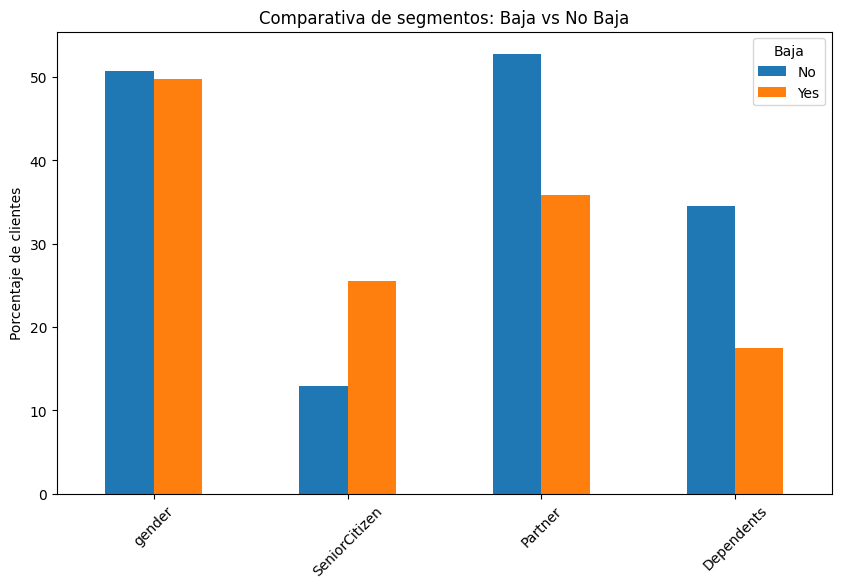

In [38]:
# Segmentos
segmentos = porcentaje_segmento.copy()
segmentos.index = ['No', 'Yes']  # filas: Baja=No, Baja=Yes

# Transponer para que las categorías estén en el eje x
segmentos_T = segmentos.T

# Gráfico de barras comparativo
segmentos_T.plot(kind='bar', figsize=(10,6))
plt.title('Comparativa de segmentos: Baja vs No Baja')
plt.ylabel('Porcentaje de clientes')
plt.xticks(rotation=45)
plt.legend(title='Baja')
plt.savefig("/content/drive/MyDrive/telecomX/segmentos_comparativa.png", format="png", dpi=300, bbox_inches='tight')
plt.show()


podemos observar que el segmentos mas critico es:

personas mayores a 65, ya que el 25.47 % de estos son los que se van

lo que genera retencion es:

personas con pareja, son 52.82 % de los que conservan el sevicio

personas con hijos, el 34.48 % de los que tienen hijos se quedan

determinamos que los factores de riesgo son:

personas mayores, personas sin pareja y personas sin hijos

In [39]:
tabla_factores_baja = datos_factores.copy()
tabla_factores_baja["Baja"] = datos_num["Baja"]

# Porcentaje por grupo
porcentaje_factores = tabla_factores_baja.groupby("Baja").mean() * 100
porcentaje_factores_t =porcentaje_factores.T
porcentaje_factores_t

Baja,0,1
PhoneService,90.104368,90.904227
MultipleLines,40.993429,45.478866
OnlineSecurity,33.320448,15.783842
OnlineBackup,36.838036,27.982879
DeviceProtection,36.277542,29.159979
TechSupport,33.513722,16.586410
StreamingTV,36.586780,43.552702
StreamingMovies,36.992656,43.766720
PaperlessBilling,53.556243,74.906367
InternetService_DSL,37.920371,24.558587


In [40]:
def resaltar_max_por_col(col):
    max_val = col.max()
    if col.name:  # columna actual
        return ['background-color: green' if v == max_val and col.name else '' for v in col]

# Ahora con condicional según Baja
def resaltar_por_baja(col):
    max_val = col.max()
    return [
        'background-color: green' if v == max_val and col.name=='Baja=No' else
        'background-color: red' if v == max_val and col.name=='Baja=Yes' else
        ''
        for v in col
    ]

# No trasponer
factores_style = porcentaje_factores.style.apply(
    lambda col: [
        'background-color: green' if v == col.max() and idx == 1
        else 'background-color: red' if v == col.max() and idx == 0
        else ''
        for idx, v in enumerate(col)
    ],
    axis=0
).format("{:.2f} %")
factores_style

,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Baja,,,,,,,,,,,,,,,,,,,
0,90.10 %,40.99 %,33.32 %,36.84 %,36.28 %,33.51 %,36.59 %,36.99 %,53.56 %,37.92 %,34.77 %,27.31 %,42.91 %,25.26 %,31.83 %,24.86 %,24.93 %,25.01 %,25.20 %
1,90.90 %,45.48 %,15.78 %,27.98 %,29.16 %,16.59 %,43.55 %,43.77 %,74.91 %,24.56 %,69.40 %,6.05 %,88.55 %,8.88 %,2.57 %,13.80 %,12.41 %,57.30 %,16.48 %


In [41]:
pf_t = porcentaje_factores.T.copy()  # tabla traspuesta

# Función para resaltar según la comparación Yes vs No por fila
def resaltar_por_comparacion(row):
    no_val = row[0]   # Baja=No
    yes_val = row[1]  # Baja=Yes
    estilos = []
    for col, val in row.items():
        if col == 0:  # columna No
            estilos.append('background-color: red' if val > yes_val else '')
        elif col == 1:  # columna Yes
            estilos.append('background-color: green' if val > no_val else '')
        else:
            estilos.append('')
    return estilos

factores_style_t1 = pf_t.style.apply(resaltar_por_comparacion, axis=1).format("{:.2f} %")
factores_style_t = pf_t.style.apply(resaltar_por_comparacion, axis=1).format("{:.2f} %").set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black'),
                                 ('background-color', 'white'),
                                 ('text-align', 'center')]},
    {'selector': 'td', 'props': [('border', '1px solid black'),
                                 ('text-align', 'center')]}
])\
.set_properties(**{'font-size':'12pt','font-family':'Arial'})
factores_style_t

Baja,0,1
PhoneService,90.10 %,90.90 %
MultipleLines,40.99 %,45.48 %
OnlineSecurity,33.32 %,15.78 %
OnlineBackup,36.84 %,27.98 %
DeviceProtection,36.28 %,29.16 %
TechSupport,33.51 %,16.59 %
StreamingTV,36.59 %,43.55 %
StreamingMovies,36.99 %,43.77 %
PaperlessBilling,53.56 %,74.91 %
InternetService_DSL,37.92 %,24.56 %


<Figure size 1200x600 with 0 Axes>

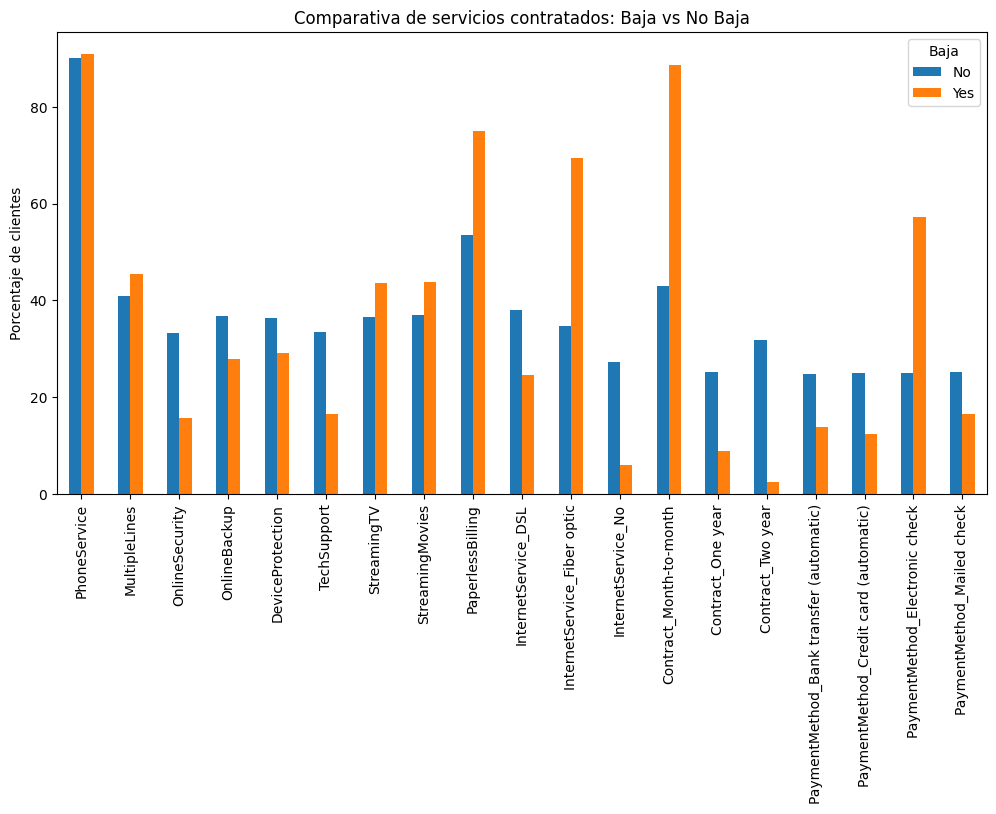

In [42]:
# Servicios
factores = porcentaje_factores.copy()
factores.index = ['No', 'Yes']  # filas: Baja=No, Baja=Yes

# Transponer
factores_T = factores.T

# Gráfico de barras comparativo
plt.figure(figsize=(12,6))
factores_T.plot(kind='bar', figsize=(12,6))
plt.title('Comparativa de servicios contratados: Baja vs No Baja')
plt.ylabel('Porcentaje de clientes')
plt.xticks(rotation=90)
plt.legend(title='Baja')
plt.savefig("/content/drive/MyDrive/telecomX/barras_comparativo.png", format="png", dpi=300, bbox_inches='tight')
plt.show()


clasificación servicios contratados:

ayuda a la retencion:

-onlinesecurity

-onlineBackup

-DeviceProtetion

-Techsupport

riesgo:

-streamingTV

-StreamingMovies

-internet fibra optica

-contrato mensual

-PaymentMethod_Electronic check

-PaperlessBilling




##Analisis de correlacion

In [43]:
corr_continuas = datos_continuas.corr()

# Aplicar estilo

corr_style = corr_continuas.style.apply(
    lambda col: [
        'background-color: red' if v == col.min()
        else ''
        for v in col
    ],
    axis=0
).format("{:.2f}")
corr_style1 = corr_continuas.style.apply(
    lambda col: [
        'background-color: red' if v == col.min()
        else ''
        for v in col
    ],
    axis=0
).format("{:.2f}").set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black'),
                                 ('background-color', 'white'),
                                 ('text-align', 'center')]},
    {'selector': 'td', 'props': [('border', '1px solid black'),
                                 ('text-align', 'center')]}
])\
.set_properties(**{'font-size':'12pt','font-family':'Arial'})


corr_style1

,tenure,Monthly
tenure,1.00,0.25
Monthly,0.25,1.00


In [44]:
# Variables binarias + continuas + columna Baja
datos_corr = datos_num.copy()  # dataset ya codificado
corr_baja = datos_corr.corr()['Baja'].sort_values(ascending=False)
corr_baja


,Baja
Baja,1.000000
Contract_Month-to-month,0.405103
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
Monthly,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
StreamingTV,0.063228
StreamingMovies,0.061382
MultipleLines,0.040102


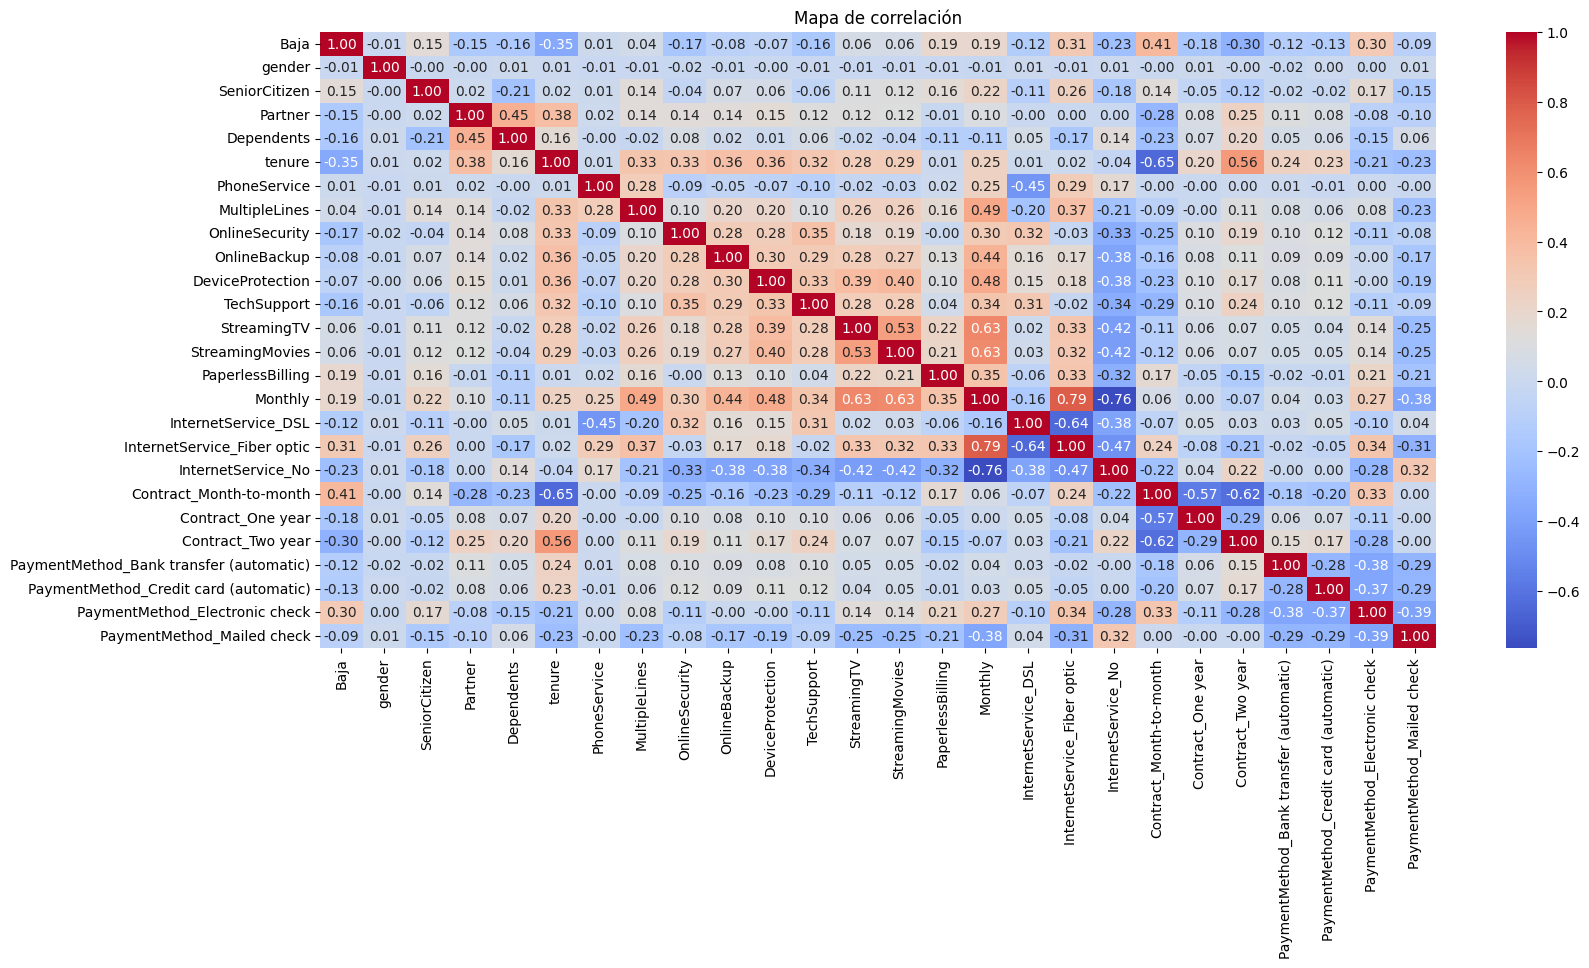

In [45]:
plt.figure(figsize=(18,8))
sns.heatmap(datos_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de correlación")
plt.savefig("/content/drive/MyDrive/telecomX/mapa_Corr.png", format="png", dpi=300, bbox_inches='tight')
plt.show()


**EMPRESA TELECOM X**


Informe de Análisis de Baja de Clientes - TelecomX

1. Introducción

El objetivo de este análisis es identificar patrones de clientes que se dan de baja y aquellos que permanecen, de acuerdo a la información obtenida por parte del cliente, se reporta una alza en la cancelación de servicios, se solicita el acceso a la base de datos del cliente para poder verificar la información, entender su situación y poder ofrecer estrategias de retención.

2. Limpieza y Tratamiento de Datos

Los datos obtenidos por parte del cliente se encuentan en el repositorio de GitHub ( https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json)

Los datos se encuentran en un archivo  .JSON, los cuales se importaron mediante la librería pandas y se establecieron como un DataFrame denominado datos, estos datos de inicio nos entregaron 6 columnas, de las cuales 4 tenian columnas con diccionarios/JSON anidados, los cuales se procedieron a transformar en columnas individuales, se contatenaron ( unieron) al dataframe datos para trabajarlo todo junto.

verificamos que no exitan valores vacios, eliminamos simbolos en las columnas pertinentes, cambiamos el nombre de churn a Baja para facilitar el analisis, eliminamos las columnas Cliente ID, y Total, ya que estos no generan valor para este analisis.

Se inicia el analisis exploratorio para determinar % de retencion, y encontramos que hay datos que no sabemos si el cliente se encuenta o no activo, pero representa menos del 5% de los datos, por lo cual procedemos a segmentar solamente y trabajar con clientes activos y no activos, siendo ahora este nuestro 100% del universo.
Verificamos que los datos tuvieran la correlación logica correspondiente, esto para la parte de servicio telefonico, si no tenian contratado, que coincidiera con los valores de no o no servicio telefonico, de igual manera con las correlaciones del servicio de internet.

Separamos los datos de manera categorica y numerica para proceder con el analisis.
Transformando los datos de genero: Male (1)/Female (0) , yes(1)/No(0) y creamos variables tipo dummy, separandolas por variable para tratarlas de manera booleana, y despues de manera entera True = 1 / False =0.


3. Analisis exploratorio de datos

De los datos suministrados pro el cliente obtuvimos un total de 7267 registros

distribuidos de la siguiente manera:

- Total de clientes: 7043
- Porcentaje de clientes dados de baja: 26.54 %


para facilitar el analisis se clasificará de diferentes maneras, lo cual nos permitira tener una vision mas clara de como
estan distribuidos los datos, quedando las clasificaciones de la siguiente manera:

- Segmentos demograficos
	- Gender
	- SeniorCitizen
	- Partner
	- Dependents

![Segmentos demográficos](/content/drive/MyDrive/telecomX/tabla_estilo_segmento.png){ width=1000 }

Donde el 50.48% de los clientes son hombres, 48.30% tienen pareja, 29.96 tienen dependientes, y el 16.21 son señores mayores a 65 años

La base de clientes está compuesta por hombres y mujeres en proporciones prácticamente iguales (50/50).
Cerca de la mitad tiene pareja (48%), pero sólo el 30% tiene dependientes. Los adultos mayores representan 16%,
lo cual indica que la base está dominada por clientes de edad media.

- Servicios contratados:
	- PhoneService
	- MultipleLines
	- OnlineSecurity
	- OnlineBackup
	- DeviceProtection
	- TechSupport
	- StreamingTV
	- StreamingMovies
	- PaperlessBilling
	- InternetService_DSL
	- InternetService_Fiber optic
	- No InternetService
	- Contract_Month-to-month
	- Contract_One year
	- Contract_Two year
	- PaymentMethod_Bank transfer (automatic)
	- PaymentMethod_Credit card (automatic)
	- PaymentMethod_Electronic check
	- PaymentMethod_Mailed check

![Factores](/content/drive/MyDrive/telecomX/tabla_estilo_factores.png){ width=700 }

Como podemos observar, la empresa es  principalmente proveedora del servicio de telefonia,
siendo este un servicio requerido por el 90% de sus clientes, mas de la mitad utiliza el sistema PaperlesBilling,
aproximadamente la mitad (55.02%) de sus usuarios tienen un contrato mes a mes (posible riesgo) y el segundo servicio
mas contratado por sus clientes es el intenternet de fibra optica con un 43.96% del total de sus clientes (Factor importante a analizar).


- Variables continuas:
	- tenure
	- Monthly

las cuales nos permitiran evaluar el tiempo promedio de retencion del cliente, ver cuales son los
periodos de mayor estadia como cliente, el costo mensual que representa a la media del los clientes, y el segmento de clientes con mayor riesgo de baja.


3.1 Análisis de Variables Continuas



| Variable | Media Baja | Media No Baja | Mediana Baja | Mediana No Baja |
|----------|------------|---------------|--------------|----------------|
| tenure   | 17.98      | 37.57         | 10.00        | 38.00          |
| Monthly  | 74.44      | 61.27         | 79.65        | 64.43          |

![Boxplot Baja vs No](/content/drive/MyDrive/telecomX/boxplot_baja_vs_no.png){ width=500 }

aunque el promedio de estancia de los clientes es de 18 meses, al calcular la mediana obtenermos que la mayor parte de los
clientes que se van, tienen 10 meses o menos, de igual manera, visualizamos que los clientes que se dan de baja el costo mensual
del servicio que tienen contratado es alto.

**Insight:**

- Clientes que se dan de baja son generalmente nuevos y con planes más caros.

3.2 Análisis de Segmentos de Clientes

| Segmento       | Baja=No (%) | Baja=Yes (%) |
|----------------|------------|-------------|
| SeniorCitizen   | 12.87      | 25.47       |
| Partner         | 52.82      | 35.79       |
| Dependents      | 34.48      | 17.44       |

![Segmentos comparativa](/content/drive/MyDrive/telecomX/segmentos_comparativa.png){ width=700 }

Podemos observar que el segmentos mas critico es:
personas mayores a 65, ya que el 25.47 % de estos son los que se van
lo que genera retencion es:
personas con pareja, son 52.82 % de los que conservan el sevicio
personas con hijos, el 34.48 % de los que tienen hijos se quedan.

!![Segmento style](/content/drive/MyDrive/telecomX/segmento_style.png){ width=800 }

**Insight:**
- Mayor riesgo: clientes mayores, sin pareja ni dependientes.

3.3 Análisis de Servicios Contratados

mediante el analisis realizado de configurariones de servicio de la clientela, podemos
clasificar los segmentos, para ver cuales son los que propician la salida o retencion del cliente.

![Barras comparativo](/content/drive/MyDrive/telecomX/barras_comparativo.png){ width=700 }

Para facilitar el entendimiento de los graficos, se muestra por medio de una tabla, ya clasificados, como afectan
los servicios que la empresa **TelecomX**, siendo si estos representan un riesgo para la salida o la retencion de clientes.

![Factores style transpuesta](/content/drive/MyDrive/telecomX/factores_style_t.png){ width=700 }

**Resumen**:

| Servicio | Baja=No (%) | Baja=Yes (%) | Clasificación |
|----------|------------|-------------|----------------|
| OnlineSecurity | 33.32 | 15.78 | Protege |
| OnlineBackup   | 36.84 | 27.98 | Protege |
| DeviceProtection | 36.28 | 29.16 | Protege |
| TechSupport    | 33.51 | 16.59 | Protege |
| StreamingTV    | 36.59 | 43.55 | Riesgo |
| StreamingMovies| 36.99 | 43.77 | Riesgo |
| Internet Fibra | 34.77 | 69.39 | Riesgo |
| Contract Month-to-month | 42.91 | 88.55 | Riesgo |
| PaymentMethod Electronic Check | 25.00 | 57.30 | Riesgo |
| PaperlessBilling | 53.56 | 74.91 | Riesgo |

**Insight:**
- Servicios de soporte protegen contra la baja.
- Contratos mensuales, planes caros y métodos de pago electrónicos aumentan el riesgo.


4.Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

a lo largo del analisis observamos cuales fueron los sectores demograficos, de riesgo, y la media de cobro y retencion del servicio.


Se emiten las siguientes observaciones:



1. Para contrarrestar la salida de los clientes, se debe de evaluar la **calidad** del servicio que se le brinda a los clientes con respecto al **precio**

Los clientes que adquieren paquetes de internet fibra optica, y algun complemento adicional de streaming, no ve un gran **valor** vs el **gasto promedio** que conlleva dicha suscripcion

2. Los contratos **Month-to-Month**, los tipos de **pago electronico**, son la mayor razon de la no retención de los clientes, no genera un compromiso y al permitir **cancelaciones tempranas**, no deja ver el valor real del servicio al cliente.

si, bien, el servicio de paga electronico, permite al cliente reducir tramites, o movilización para pagar el servicio, al tener servicios **de alto** costo y **poco valor** el cliente optara por culminar su contrato

Se emiten las siguientes observaciones:

1. Focalizar campañas de retención en **clientes nuevos, mayores y sin dependientes**.

2. Promover la contratación de **servicios de soporte** y contratos de mayor duración.

3. Revisar planes de fibra y métodos de pago electrónicos para reducir el riesgo de baja.



5. analisis adicional

se realizaron tablas de correlación para complementar y validar nuestro analisis el cual muesta lo siguiente

![Correlación estilo](/content/drive/MyDrive/telecomX/corr_style1.png){ width=800 }

donde nos muestra que individualmente no exite una correlación entre el pago mensual y la baja.

en la siguiente tabla podemos observar cuales son los factores con mayor correlación, posibles caudas (cercanos a 1)  y cuales son los que ayudan como sistema de retención ( cercanos a -1).

| Variable                                | Correlación con Baja |
|----------------------------------------|--------------------|
| Baja                                    | 1.000000           |
| Contract_Month-to-month                 | 0.405103           |
| InternetService_Fiber optic             | 0.308020           |
| PaymentMethod_Electronic check          | 0.301919           |
| Monthly                                 | 0.193356           |
| PaperlessBilling                        | 0.191825           |
| SeniorCitizen                           | 0.150889           |
| StreamingTV                             | 0.063228           |
| StreamingMovies                         | 0.061382           |
| MultipleLines                           | 0.040102           |
| PhoneService                            | 0.011942           |
| gender                                  | -0.008612          |
| DeviceProtection                        | -0.066160          |
| OnlineBackup                            | -0.082255          |
| PaymentMethod_Mailed check              | -0.091683          |
| PaymentMethod_Bank transfer (automatic)| -0.117937          |
| InternetService_DSL                      | -0.124214          |
| PaymentMethod_Credit card (automatic)  | -0.134302          |
| Partner                                 | -0.150448          |
| Dependents                              | -0.164221          |
| TechSupport                             | -0.164674          |
| OnlineSecurity                           | -0.171226          |
| Contract_One year                        | -0.177820          |
| InternetService_No                       | -0.227890          |
| Contract_Two year                        | -0.302253          |
| tenure                                  | -0.352229          |


Mapa completo de correlacion:

![Mapa de correlación](/content/drive/MyDrive/telecomX/mapa_Corr.png){ width=600 }



In [46]:
tabla_estilo_segmento

,Porcentaje
gender,50.48 %
Partner,48.30 %
Dependents,29.96 %
SeniorCitizen,16.21 %


In [47]:
tabla_estilo_factores

,Porcentaje
PhoneService,90.32 %
PaperlessBilling,59.22 %
Contract_Month-to-month,55.02 %
InternetService_Fiber optic,43.96 %
MultipleLines,42.18 %
StreamingMovies,38.79 %
StreamingTV,38.44 %
OnlineBackup,34.49 %
DeviceProtection,34.39 %
InternetService_DSL,34.37 %


In [48]:
segmento_style1 #para png segmento_style

,gender,SeniorCitizen,Partner,Dependents
Baja,,,,
0,50.73 %,12.87 %,52.82 %,34.48 %
1,49.76 %,25.47 %,35.79 %,17.44 %


In [49]:
factores_style_t1

Baja,0,1
PhoneService,90.10 %,90.90 %
MultipleLines,40.99 %,45.48 %
OnlineSecurity,33.32 %,15.78 %
OnlineBackup,36.84 %,27.98 %
DeviceProtection,36.28 %,29.16 %
TechSupport,33.51 %,16.59 %
StreamingTV,36.59 %,43.55 %
StreamingMovies,36.99 %,43.77 %
PaperlessBilling,53.56 %,74.91 %
InternetService_DSL,37.92 %,24.56 %


In [50]:
corr_style

,tenure,Monthly
tenure,1.00,0.25
Monthly,0.25,1.00


Diccionario de datos


customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

In [98]:
informe_texto = """
**EMPRESA TELECOM X**


Informe de Análisis de Baja de Clientes - TelecomX

1. Introducción

El objetivo de este análisis es identificar patrones de clientes que se dan de baja y aquellos que permanecen, de acuerdo a la información obtenida por parte del cliente, se reporta una alza en la cancelación de servicios, se solicita el acceso a la base de datos del cliente para poder verificar la información, entender su situación y poder ofrecer estrategias de retención.

2. Limpieza y Tratamiento de Datos

Los datos obtenidos por parte del cliente se encuentan en el repositorio de GitHub ( https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json)

Los datos se encuentran en un archivo  .JSON, los cuales se importaron mediante la librería pandas y se establecieron como un DataFrame denominado datos, estos datos de inicio nos entregaron 6 columnas, de las cuales 4 tenian columnas con diccionarios/JSON anidados, los cuales se procedieron a transformar en columnas individuales, se contatenaron ( unieron) al dataframe datos para trabajarlo todo junto.

verificamos que no exitan valores vacios, eliminamos simbolos en las columnas pertinentes, cambiamos el nombre de churn a Baja para facilitar el analisis, eliminamos las columnas Cliente ID, y Total, ya que estos no generan valor para este analisis.

Se inicia el analisis exploratorio para determinar % de retencion, y encontramos que hay datos que no sabemos si el cliente se encuenta o no activo, pero representa menos del 5% de los datos, por lo cual procedemos a segmentar solamente y trabajar con clientes activos y no activos, siendo ahora este nuestro 100% del universo.
Verificamos que los datos tuvieran la correlación logica correspondiente, esto para la parte de servicio telefonico, si no tenian contratado, que coincidiera con los valores de no o no servicio telefonico, de igual manera con las correlaciones del servicio de internet.

Separamos los datos de manera categorica y numerica para proceder con el analisis.
Transformando los datos de genero: Male (1)/Female (0) , yes(1)/No(0) y creamos variables tipo dummy, separandolas por variable para tratarlas de manera booleana, y despues de manera entera True = 1 / False =0.


3. Analisis exploratorio de datos

De los datos suministrados pro el cliente obtuvimos un total de 7267 registros

distribuidos de la siguiente manera:

- Total de clientes: 7043
- Porcentaje de clientes dados de baja: 26.54 %


para facilitar el analisis se clasificará de diferentes maneras, lo cual nos permitira tener una vision mas clara de como
estan distribuidos los datos, quedando las clasificaciones de la siguiente manera:

- Segmentos demograficos
	- Gender
	- SeniorCitizen
	- Partner
	- Dependents

![Segmentos demográficos](/content/drive/MyDrive/telecomX/tabla_estilo_segmento.png){ width=1000 }

Donde el 50.48% de los clientes son hombres, 48.30% tienen pareja, 29.96 tienen dependientes, y el 16.21 son señores mayores a 65 años

La base de clientes está compuesta por hombres y mujeres en proporciones prácticamente iguales (50/50).
Cerca de la mitad tiene pareja (48%), pero sólo el 30% tiene dependientes. Los adultos mayores representan 16%,
lo cual indica que la base está dominada por clientes de edad media.

- Servicios contratados:
	- PhoneService
	- MultipleLines
	- OnlineSecurity
	- OnlineBackup
	- DeviceProtection
	- TechSupport
	- StreamingTV
	- StreamingMovies
	- PaperlessBilling
	- InternetService_DSL
	- InternetService_Fiber optic
	- No InternetService
	- Contract_Month-to-month
	- Contract_One year
	- Contract_Two year
	- PaymentMethod_Bank transfer (automatic)
	- PaymentMethod_Credit card (automatic)
	- PaymentMethod_Electronic check
	- PaymentMethod_Mailed check

![Factores](/content/drive/MyDrive/telecomX/tabla_estilo_factores.png){ width=700 }

Como podemos observar, la empresa es  principalmente proveedora del servicio de telefonia,
siendo este un servicio requerido por el 90% de sus clientes, mas de la mitad utiliza el sistema PaperlesBilling,
aproximadamente la mitad (55.02%) de sus usuarios tienen un contrato mes a mes (posible riesgo) y el segundo servicio
mas contratado por sus clientes es el intenternet de fibra optica con un 43.96% del total de sus clientes (Factor importante a analizar).


- Variables continuas:
	- tenure
	- Monthly

las cuales nos permitiran evaluar el tiempo promedio de retencion del cliente, ver cuales son los
periodos de mayor estadia como cliente, el costo mensual que representa a la media del los clientes, y el segmento de clientes con mayor riesgo de baja.


3.1 Análisis de Variables Continuas



| Variable | Media Baja | Media No Baja | Mediana Baja | Mediana No Baja |
|----------|------------|---------------|--------------|----------------|
| tenure   | 17.98      | 37.57         | 10.00        | 38.00          |
| Monthly  | 74.44      | 61.27         | 79.65        | 64.43          |

![Boxplot Baja vs No](/content/drive/MyDrive/telecomX/boxplot_baja_vs_no.png){ width=500 }

aunque el promedio de estancia de los clientes es de 18 meses, al calcular la mediana obtenermos que la mayor parte de los
clientes que se van, tienen 10 meses o menos, de igual manera, visualizamos que los clientes que se dan de baja el costo mensual
del servicio que tienen contratado es alto.

**Insight:**

- Clientes que se dan de baja son generalmente nuevos y con planes más caros.

3.2 Análisis de Segmentos de Clientes

| Segmento       | Baja=No (%) | Baja=Yes (%) |
|----------------|------------|-------------|
| SeniorCitizen   | 12.87      | 25.47       |
| Partner         | 52.82      | 35.79       |
| Dependents      | 34.48      | 17.44       |

![Segmentos comparativa](/content/drive/MyDrive/telecomX/segmentos_comparativa.png){ width=700 }

Podemos observar que el segmentos mas critico es:
personas mayores a 65, ya que el 25.47 % de estos son los que se van
lo que genera retencion es:
personas con pareja, son 52.82 % de los que conservan el sevicio
personas con hijos, el 34.48 % de los que tienen hijos se quedan.

!![Segmento style](/content/drive/MyDrive/telecomX/segmento_style.png){ width=800 }

**Insight:**
- Mayor riesgo: clientes mayores, sin pareja ni dependientes.

3.3 Análisis de Servicios Contratados

mediante el analisis realizado de configurariones de servicio de la clientela, podemos
clasificar los segmentos, para ver cuales son los que propician la salida o retencion del cliente.

![Barras comparativo](/content/drive/MyDrive/telecomX/barras_comparativo.png){ width=700 }

Para facilitar el entendimiento de los graficos, se muestra por medio de una tabla, ya clasificados, como afectan
los servicios que la empresa **TelecomX**, siendo si estos representan un riesgo para la salida o la retencion de clientes.

![Factores style transpuesta](/content/drive/MyDrive/telecomX/factores_style_t.png){ width=700 }

**Resumen**:

| Servicio | Baja=No (%) | Baja=Yes (%) | Clasificación |
|----------|------------|-------------|----------------|
| OnlineSecurity | 33.32 | 15.78 | Protege |
| OnlineBackup   | 36.84 | 27.98 | Protege |
| DeviceProtection | 36.28 | 29.16 | Protege |
| TechSupport    | 33.51 | 16.59 | Protege |
| StreamingTV    | 36.59 | 43.55 | Riesgo |
| StreamingMovies| 36.99 | 43.77 | Riesgo |
| Internet Fibra | 34.77 | 69.39 | Riesgo |
| Contract Month-to-month | 42.91 | 88.55 | Riesgo |
| PaymentMethod Electronic Check | 25.00 | 57.30 | Riesgo |
| PaperlessBilling | 53.56 | 74.91 | Riesgo |

**Insight:**
- Servicios de soporte protegen contra la baja.
- Contratos mensuales, planes caros y métodos de pago electrónicos aumentan el riesgo.


4.Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

a lo largo del analisis observamos cuales fueron los sectores demograficos, de riesgo, y la media de cobro y retencion del servicio.


Se emiten las siguientes observaciones:



1. Para contrarrestar la salida de los clientes, se debe de evaluar la **calidad** del servicio que se le brinda a los clientes con respecto al **precio**

Los clientes que adquieren paquetes de internet fibra optica, y algun complemento adicional de streaming, no ve un gran **valor** vs el **gasto promedio** que conlleva dicha suscripcion

2. Los contratos **Month-to-Month**, los tipos de **pago electronico**, son la mayor razon de la no retención de los clientes, no genera un compromiso y al permitir **cancelaciones tempranas**, no deja ver el valor real del servicio al cliente.

si, bien, el servicio de paga electronico, permite al cliente reducir tramites, o movilización para pagar el servicio, al tener servicios **de alto** costo y **poco valor** el cliente optara por culminar su contrato

Se emiten las siguientes observaciones:

1. Focalizar campañas de retención en **clientes nuevos, mayores y sin dependientes**.

2. Promover la contratación de **servicios de soporte** y contratos de mayor duración.

3. Revisar planes de fibra y métodos de pago electrónicos para reducir el riesgo de baja.



5. analisis adicional

se realizaron tablas de correlación para complementar y validar nuestro analisis el cual muesta lo siguiente

![Correlación estilo](/content/drive/MyDrive/telecomX/corr_style1.png){ width=800 }

donde nos muestra que individualmente no exite una correlación entre el pago mensual y la baja.

en la siguiente tabla podemos observar cuales son los factores con mayor correlación, posibles caudas (cercanos a 1)  y cuales son los que ayudan como sistema de retención ( cercanos a -1).

| Variable                                | Correlación con Baja |
|----------------------------------------|--------------------|
| Baja                                    | 1.000000           |
| Contract_Month-to-month                 | 0.405103           |
| InternetService_Fiber optic             | 0.308020           |
| PaymentMethod_Electronic check          | 0.301919           |
| Monthly                                 | 0.193356           |
| PaperlessBilling                        | 0.191825           |
| SeniorCitizen                           | 0.150889           |
| StreamingTV                             | 0.063228           |
| StreamingMovies                         | 0.061382           |
| MultipleLines                           | 0.040102           |
| PhoneService                            | 0.011942           |
| gender                                  | -0.008612          |
| DeviceProtection                        | -0.066160          |
| OnlineBackup                            | -0.082255          |
| PaymentMethod_Mailed check              | -0.091683          |
| PaymentMethod_Bank transfer (automatic)| -0.117937          |
| InternetService_DSL                      | -0.124214          |
| PaymentMethod_Credit card (automatic)  | -0.134302          |
| Partner                                 | -0.150448          |
| Dependents                              | -0.164221          |
| TechSupport                             | -0.164674          |
| OnlineSecurity                           | -0.171226          |
| Contract_One year                        | -0.177820          |
| InternetService_No                       | -0.227890          |
| Contract_Two year                        | -0.302253          |
| tenure                                  | -0.352229          |


Mapa completo de correlacion:

![Mapa de correlación](/content/drive/MyDrive/telecomX/mapa_Corr.png){ width=600 }

"""

with open("informe.md", "w", encoding="utf-8") as f:
    f.write(informe_texto)

Crear pdf:




```
!pandoc informe.md -o "/content/drive/MyDrive/telecomX/reporte_final.pdf" \
--pdf-engine=xelatex \
--variable=geometry:margin=2cm \
--variable=figure-placement:H



```



para guardar tablas style








```
!apt-get install pandoc
!pip install pypandoc
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic -y
!pip install weasyprint
from weasyprint import HTML
from PIL import Image
# Instalar dependencias en Colab (solo la primera vez)
!apt-get install -y wkhtmltopdf
!pip install imgkit
import imgkit
config = imgkit.config(wkhtmltoimage='/usr/bin/wkhtmltoimage')

def exportar_tabla(style_object, nombre_archivo):

    # 📂 Ruta donde quieres guardar los archivos
    ruta = "/content/drive/MyDrive/telecomX/"   # <-- TU CARPETA

    # 📄 Archivos con ruta completa
    archivo_html = ruta + f"{nombre_archivo}.html"
    archivo_png  = ruta + f"{nombre_archivo}.png"
    archivo_pdf  = ruta + f"{nombre_archivo}.pdf"

    # Guardar HTML
    style_object.to_html(archivo_html)

    # Convertir a PNG
    imgkit.from_file(archivo_html, archivo_png, config=config)

    # HTML → PDF
    HTML(archivo_html).write_pdf(archivo_pdf)

    print(f"Archivos generados en: {ruta}")
    print(f"- {nombre_archivo}.html")
    print(f"- {nombre_archivo}.png")
    print(f"- {nombre_archivo}.pdf")

exportar_tabla(tabla_estilo_segmento, "tabla_estilo_segmento")
exportar_tabla(tabla_estilo_factores, "tabla_estilo_factores")
exportar_tabla(segmento_style, "segmento_style")
exportar_tabla(factores_style_t, "factores_style_t")
exportar_tabla(corr_style1, "corr_style1")


```

